**Options Analyzer Demo**

* How do I get the files needed to use the package(s)?

You can find the balances file export on My Account: Overview and the transactions file export on My Account: History and Statements. See images below.

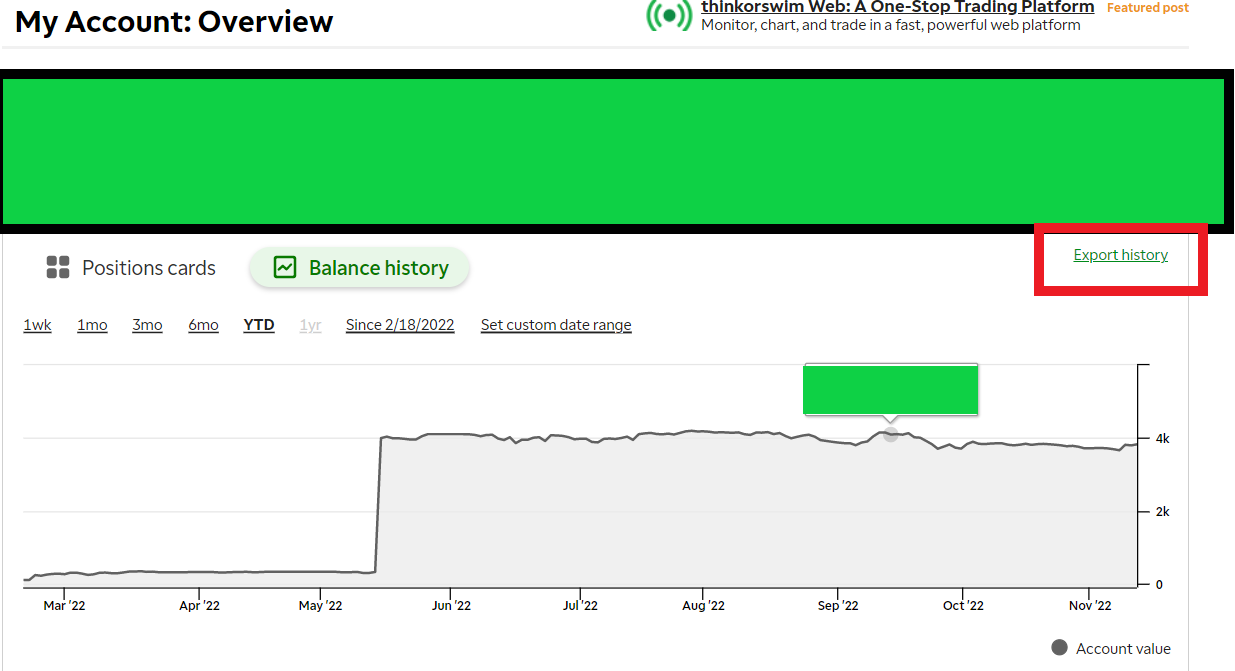

In [2]:
from IPython.display import Image
Image('Balance.png')

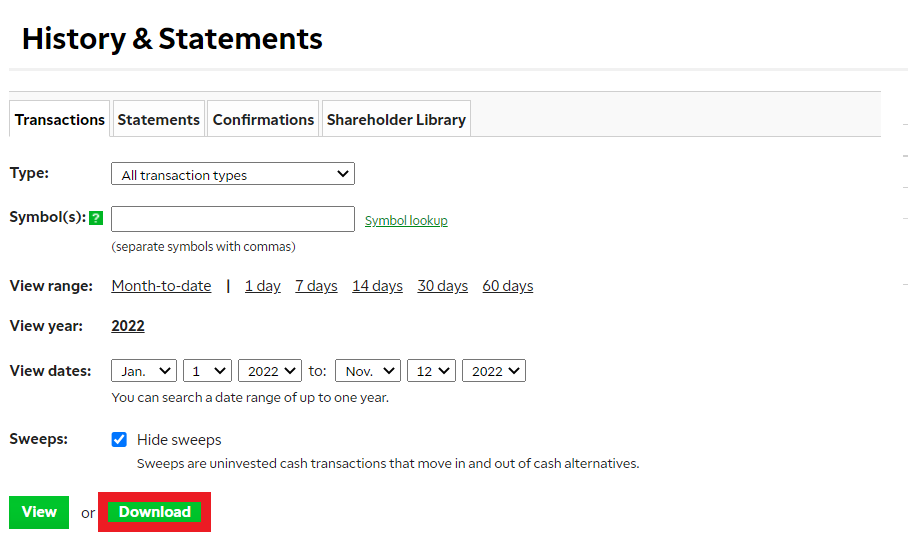

In [3]:
Image('Transacts.png')

Now that you have the files, we will explore some package functionalities.

In [4]:
from Analyzer import Transactions, Balances
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [5]:
# Create transactions and balances instances; don't be surprised if this takes a while. Transactions needs to query yfinance
# multiple times in order to get the needed options data for later analysis.
trans = Transactions('trans1.xlsx')
bals = Balances('bals.xlsx')

In [7]:
plt.rcParams['figure.figsize'] = [20, 15]

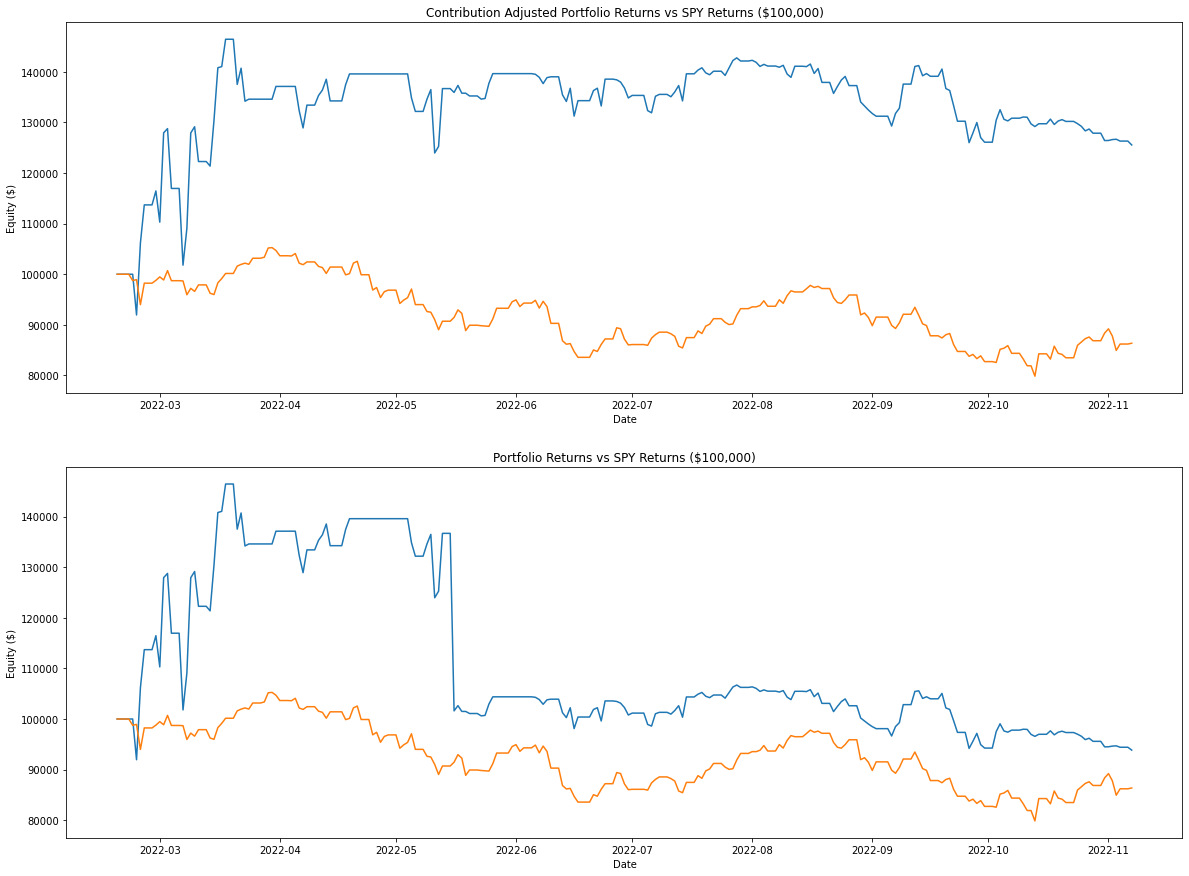

In [8]:
# The summary method from Balances will give you a graph of your returns both contribution adjusted and not. 
summary = bals.summary(trans)

In [9]:
summary # This is still a work in progress, planning on adding multiple other metrics ex. Sharpe.

,Total Return,Beta
Contribution Adjusted,0.255559,-0.029740
Not Adjusted,-0.061503,-0.001736


Important to distinguish the difference between contribution adjusted and not -- not adjusted is simply seeing where your account equity is in relation to the total amount of money you have deposited over time. Where as contribution adjusted will take out that consideration, showing you your percentage gain in the account should you have had started and ended with the same deposit. 

In [10]:
# From Transactions, the open_positions attribute will show you your current open options positions. 
trans.open_positions.head()

,Tran ID,Desc,Quantity,Symbol,Price,Commission,Amount,Option Object
Date,,,,,,,,
2022-11-08,4.624110e+10,Sold 1 CIM Dec 16 2022 6.0 Call @ 0.56,1.0,CIM Dec 16 2022 6.0 Call,0.56,0.52,55.47,<Options.Option object at 0x000001E8F29EA230>
2022-11-08,4.624110e+10,Bought 1 CIM Dec 16 2022 4.0 Put @ 0.07,1.0,CIM Dec 16 2022 4.0 Put,0.07,0.52,-7.53,<Options.Option object at 0x000001E8F3280430>
2022-11-08,4.624110e+10,Sold 1 CIM Dec 16 2022 6.0 Put @ 0.38,1.0,CIM Dec 16 2022 6.0 Put,0.38,0.52,37.47,<Options.Option object at 0x000001E8F3280D00>
2022-11-08,4.624110e+10,Bought 1 CIM Dec 16 2022 8.0 Call @ 0.07,1.0,CIM Dec 16 2022 8.0 Call,0.07,0.52,-7.53,<Options.Option object at 0x000001E8F32814E0>
2022-11-08,4.623836e+10,Bought 1 SBRA Dec 16 2022 10.0 Put @ 0.11,1.0,SBRA Dec 16 2022 10.0 Put,0.11,0.52,-11.53,<Options.Option object at 0x000001E8F3280670>


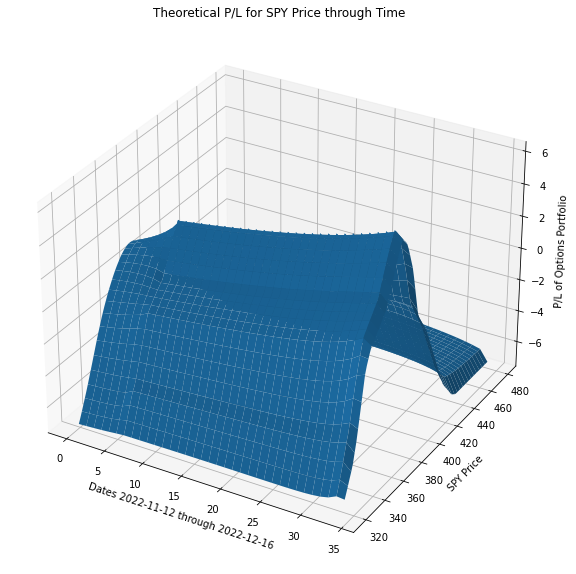

In [11]:
# From transactions, the current_mkt_exposure will show you the theoretical P/L of your open options portfolio by SPY price.
mkt_exposure = trans.current_mkt_exposure()

There are several key assumptions made by this model; implied volaility and rf remains constant from purchase of each option to expiry, and stock beta is a perfect predictor of stock prices based on market movement. What this model serves to do, is give you a rough idea of your pain and profit points according to your systematic risk. 

** Also, keep in mind that 'P/L of Options Portfolio' is according to option premium. So apply the standard 100 multiplier to find actual gains / losses. 

In this specific scenario, you can pretty clearly see that I currently hold a portfolio consisting mostly of iron condors and put credit spreads which explains the structure of the model you see. 

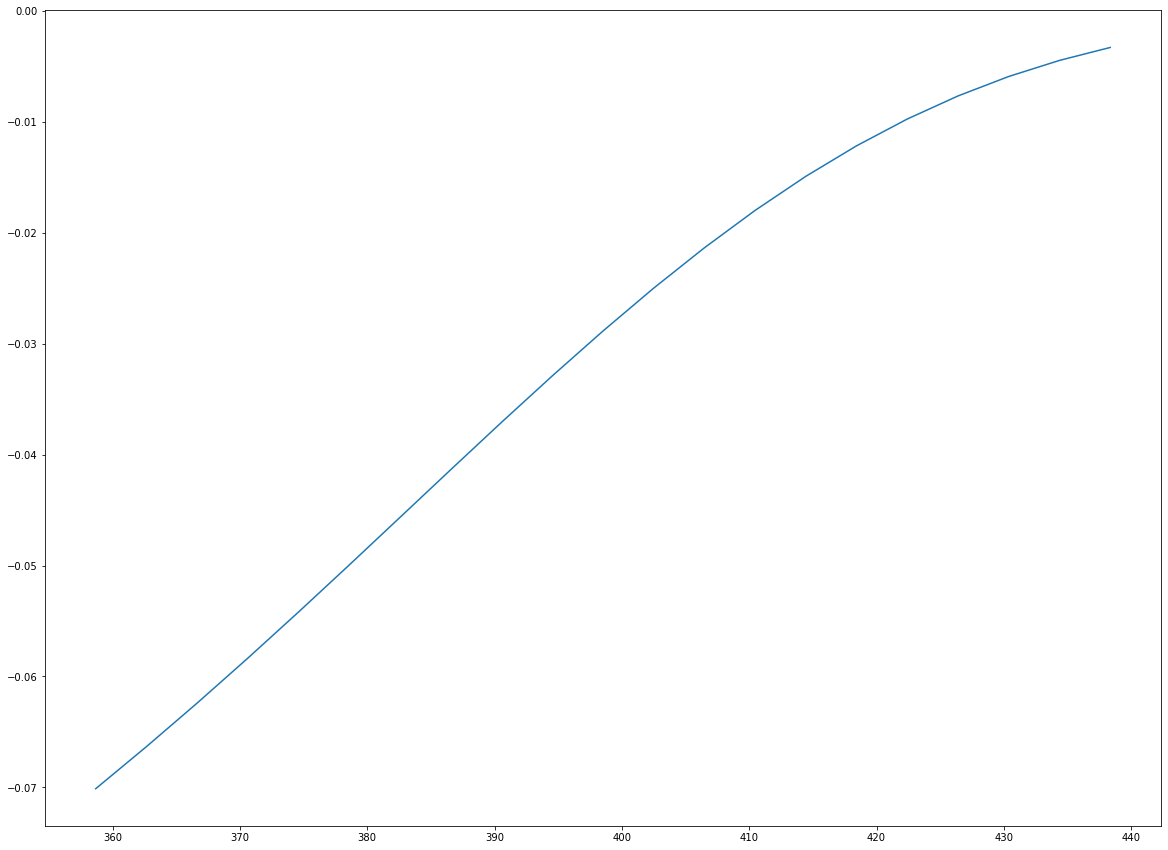

In [12]:
# From transactions, the b_w_delta method SHOULD give you an idea of your beta weighted delta through SPY price. 
beta_w_delta = trans.b_w_delta()

Method is still under construction. As you can clearly see, it does not seem to accurately represent beta weighted delta... with all the iron condors in my portfolio this should look more like an upside down U. Something is off with my math, still looking into it.

In [13]:
# From transactions, current_exposure will give you your summed greeks for every ticker in your portfolio. Holds same 
# assumption as current_mkt_exposure
trans.current_exposure()

,Delta,Gamma,Theta,Vega,Rho
Ticker,,,,,
CIM,-0.433764,-0.204806,0.155524,-0.384240,-0.185913
CRK,-0.293456,-0.082733,0.342581,-0.381392,-0.081899
CSCO,-0.388765,-0.142111,0.881623,-1.456809,-0.276923
CVE,-0.290603,0.142665,-0.060900,0.708019,-0.076841
CVNA,0.128495,-0.032961,0.581744,-0.760866,0.191402
DOCU,0.035255,-0.003475,0.200515,-0.732355,0.202814
FCX,-0.111455,0.002533,0.116477,0.107519,-0.287500
FNKO,0.357170,-0.123858,-0.028776,-0.617728,0.391761
NCLH,-0.292967,0.077403,-0.066735,0.385968,-0.054070


Not much to say on this method. It may be potentially useful for future projects, but you can already see this much more easily through the thinkorswim platform. 

**Conclusion**

This is not a comprehensive demo of the package and I encourage anyone interested to look into the code itself to find other tools that might help assist you in your trading. 

At the end of the day, I think the best functionality that is (will be) found here is being able to visualize your systematic risk according to your options portfolio and stock beta. If you are like me, and tend to utilize beta weighted delta to hedge your portfolio, I think eventually this project will be pivotal in being able to anticipate market moves and how that will affect the options in your portfolio. 

Thank you very much for checking out my project, if you have any suggestions or other input feel free to reach out to me at john.wyatt.martin@gmail.com